In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = 'userbehaviour.csv'
data = pd.read_csv(file_path)

# Check for null values
null_values = data.isnull().sum()

# Column info and descriptive statistics
column_info = data.info()
descriptive_stats = data.describe()

print(null_values)
print(descriptive_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: 

In [2]:
# Screen Time Analysis
highest_screen_time = data['Average Screen Time'].max()
lowest_screen_time = data['Average Screen Time'].min()
average_screen_time = data['Average Screen Time'].mean()

print(f'Highest Screen Time: {highest_screen_time}')
print(f'Lowest Screen Time: {lowest_screen_time}')
print(f'Average Screen Time: {average_screen_time}')


Highest Screen Time: 50.0
Lowest Screen Time: 0.0
Average Screen Time: 24.39039039039039


In [3]:
# Spending Analysis
highest_spent = data['Average Spent on App (INR)'].max()
lowest_spent = data['Average Spent on App (INR)'].min()
average_spent = data['Average Spent on App (INR)'].mean()

print(f'Highest Amount Spent: {highest_spent}')
print(f'Lowest Amount Spent: {lowest_spent}')
print(f'Average Amount Spent: {average_spent}')


Highest Amount Spent: 998.0
Lowest Amount Spent: 0.0
Average Amount Spent: 424.4154154154154


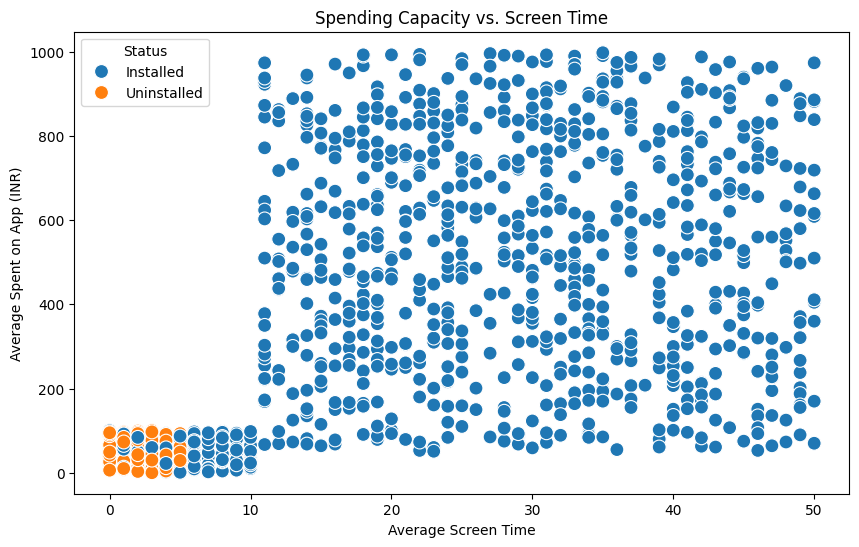

In [4]:


# Relationship between spending capacity and screen time for active and uninstalled users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Status', data=data, s=100)
plt.title('Spending Capacity vs. Screen Time')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.legend(title='Status')
plt.show()


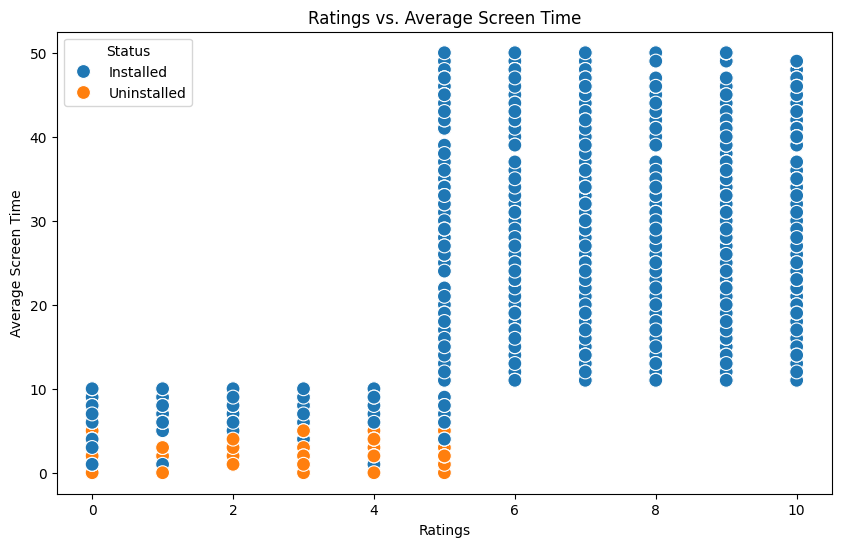

In [5]:
# Relationship between ratings and average screen time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Average Screen Time', hue='Status', data=data, s=100)
plt.title('Ratings vs. Average Screen Time')
plt.xlabel('Ratings')
plt.ylabel('Average Screen Time')
plt.legend(title='Status')
plt.show()


In [6]:


# Select relevant features for clustering
features = ['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Number of segments
num_segments = data['Cluster'].nunique()
print(f'Number of Segments: {num_segments}')


Number of Segments: 3


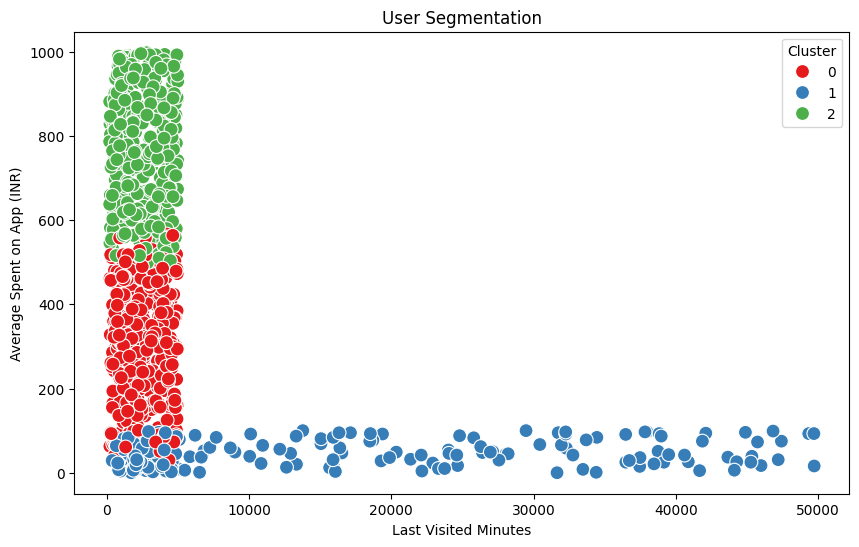

In [7]:
# Visualization of segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('User Segmentation')
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.legend(title='Cluster')
plt.show()


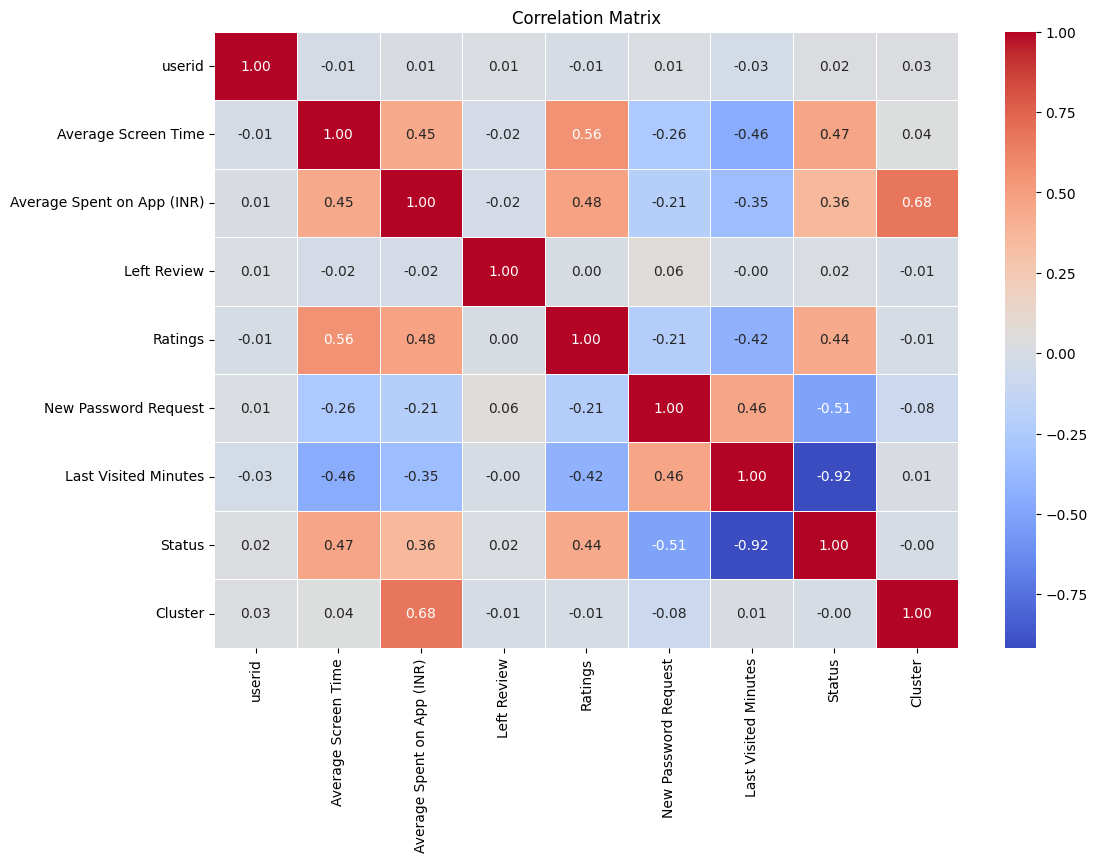

In [8]:
# Convert 'Status' column to numeric values
data['Status'] = data['Status'].map({'Installed': 1, 'Uninstalled': 0})

# Correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [10]:


# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Show anomalies
anomalies = data[data['Anomaly'] == -1]
print(anomalies)


     userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
1      1002                  0.0                        54.0            0   
38     1039                  1.0                        97.0            0   
43     1044                  4.0                        93.0            0   
46     1047                  3.0                        34.0            1   
61     1062                  5.0                        67.0            0   
..      ...                  ...                         ...          ...   
943    1944                  4.0                        42.0            0   
947    1948                  2.0                         3.0            1   
949    1950                  0.0                        95.0            0   
978    1979                  1.0                        73.0            0   
979    1980                  2.0                        43.0            1   

     Ratings  New Password Request  Last Visited Minutes  Status  Cluster  